# Introduction

The Ultimate Fighting Championship (UFC) is an intense international competition where two fighters compete in mixed martial arts. Commonly before events, there is a lot of pre-fight talk where commentators compare fighters' personalities, fighting styles, and certain behaviors to hopefully place their accurate prediction. Countless people on Twitter, YouTube, and other social media also host their own livestreams and takes of their view.

Inside the octagon, people commonly say "anything can happen", suggesting the outcome between two fighters despite predictions can be hardly known. In this project, we would like to find the truth to the statement and hopefully identify certain patterns or behaviors to aid in UFC predictions.

We will hopefully train a model when provided the following features: `stance`, `height`, `reach`, `weight`, and `age` can accurately predict a favorite.



In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import data
file = open("./dataset/data.csv", "r")
df = pd.read_csv(file)
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


# Unsupervised Analysis

We will first take a look at the dataset to identify any missing values, as well as the features we are provided. Based on our desired goal of predicting who wins a fight, our target value is the "Winner".

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [ ]:
df.shape

(6012, 144)

We have 6012 entries with 144 features

In [ ]:
for i, j in zip(df.columns, df.isnull().sum()):
    print(i, j)

R_fighter 0
B_fighter 0
Referee 32
date 0
location 0
Winner 0
title_bout 0
weight_class 0
B_avg_KD 1427
B_avg_opp_KD 1427
B_avg_SIG_STR_pct 1427
B_avg_opp_SIG_STR_pct 1427
B_avg_TD_pct 1427
B_avg_opp_TD_pct 1427
B_avg_SUB_ATT 1427
B_avg_opp_SUB_ATT 1427
B_avg_REV 1427
B_avg_opp_REV 1427
B_avg_SIG_STR_att 1427
B_avg_SIG_STR_landed 1427
B_avg_opp_SIG_STR_att 1427
B_avg_opp_SIG_STR_landed 1427
B_avg_TOTAL_STR_att 1427
B_avg_TOTAL_STR_landed 1427
B_avg_opp_TOTAL_STR_att 1427
B_avg_opp_TOTAL_STR_landed 1427
B_avg_TD_att 1427
B_avg_TD_landed 1427
B_avg_opp_TD_att 1427
B_avg_opp_TD_landed 1427
B_avg_HEAD_att 1427
B_avg_HEAD_landed 1427
B_avg_opp_HEAD_att 1427
B_avg_opp_HEAD_landed 1427
B_avg_BODY_att 1427
B_avg_BODY_landed 1427
B_avg_opp_BODY_att 1427
B_avg_opp_BODY_landed 1427
B_avg_LEG_att 1427
B_avg_LEG_landed 1427
B_avg_opp_LEG_att 1427
B_avg_opp_LEG_landed 1427
B_avg_DISTANCE_att 1427
B_avg_DISTANCE_landed 1427
B_avg_opp_DISTANCE_att 1427
B_avg_opp_DISTANCE_landed 1427
B_avg_CLINCH_att 1

Based on the number of missing values and likely irrelevance to the match outcome, we decided with the following features:

In [ ]:
features = ["Winner", "weight_class", "R_Stance", "B_Stance", "R_Height_cms", "B_Height_cms", "R_Weight_lbs", "B_Weight_lbs", "R_Reach_cms", "B_Reach_cms", "R_age", "B_age"]
orig_df = df # incase we need it again

df = df[features]
df.head()

,Winner,weight_class,R_Stance,B_Stance,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age
0,Red,Bantamweight,Orthodox,Orthodox,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0
1,Red,Middleweight,Orthodox,Orthodox,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0
2,Red,Heavyweight,Southpaw,Orthodox,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0
3,Blue,WomenStrawweight,Switch,Southpaw,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0
4,Blue,WomenBantamweight,Orthodox,Orthodox,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0


In [ ]:
df.isnull().sum()

Winner            0
weight_class      0
R_Stance         29
B_Stance         66
R_Height_cms      4
B_Height_cms     10
R_Weight_lbs      2
B_Weight_lbs      8
R_Reach_cms     406
B_Reach_cms     891
R_age            63
B_age           172
dtype: int64

In [ ]:
# Remove entries with missing features
df = df.dropna()
df.shape

(4946, 12)

In [ ]:
# LGTM!
df.isnull().sum()

Winner          0
weight_class    0
R_Stance        0
B_Stance        0
R_Height_cms    0
B_Height_cms    0
R_Weight_lbs    0
B_Weight_lbs    0
R_Reach_cms     0
B_Reach_cms     0
R_age           0
B_age           0
dtype: int64

Our dataset now has 4946 entries with 11 features. The `Winner` is our desired prediction.

In [ ]:
df.head()

,Winner,weight_class,R_Stance,B_Stance,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age
0,Red,Bantamweight,Orthodox,Orthodox,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0
1,Red,Middleweight,Orthodox,Orthodox,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0
2,Red,Heavyweight,Southpaw,Orthodox,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0
3,Blue,WomenStrawweight,Switch,Southpaw,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0
4,Blue,WomenBantamweight,Orthodox,Orthodox,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0


We will take a look at the features and some of their characteristics. We will start with categorical features.

## Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=[np.object])
for col in categorical_features.columns:
    print(col)

Winner
weight_class
R_Stance
B_Stance


Let's take a look at the `weight_class` and `Stance` distributions for the dataset.

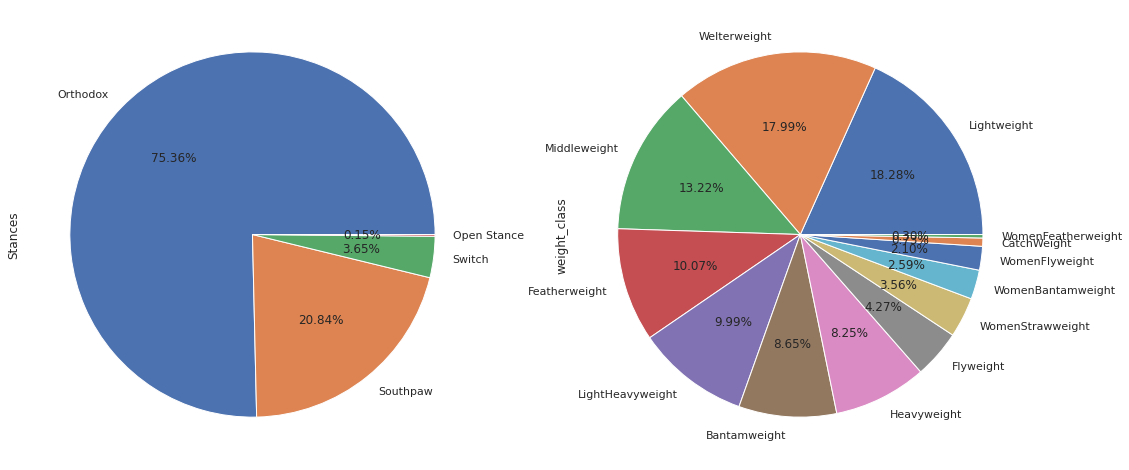

In [ ]:
fig, a = plt.subplots(ncols=2, figsize=(18, 9))

stances = pd.concat([df['R_Stance'], df['B_Stance']], axis=0) # combining all stances, double length of dataset
weights = df['weight_class']

stances.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=a[0])
a[0].set_ylabel('Stances')

weights.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=a[1])

plt.show()

`weight_class` at a glance seems quite evenly distributed. Using the feature as is should produce equal results in regards to the dataset. However because `weight_class` is an overall feature that doesn't create a difference between two fights, we may remove it entirely to reduce dimensionality.

`Stance` on the other hand seems to have a majority being `Orthodox`. Though in this case each fight has two stances, it may be worth creating a new feature to generate differences in stances.

## Numerical Features

In [ ]:
numerical_features = df.select_dtypes(include=[np.number])
for col in numerical_features.columns:
    print(col)

R_Height_cms
B_Height_cms
R_Weight_lbs
B_Weight_lbs
R_Reach_cms
B_Reach_cms
R_age
B_age


We will again combine the red and blue columns to get a general view of all the data.

In [ ]:
heights = pd.concat([df['R_Height_cms'], df['B_Height_cms']], axis=0)
weights = pd.concat([df['R_Weight_lbs'], df['B_Weight_lbs']], axis=0)
reaches = pd.concat([df['R_Reach_cms'], df['B_Reach_cms']], axis=0)
ages = pd.concat([df['R_age'], df['B_age']], axis=0)

numerical_features = pd.concat([heights, weights, reaches, ages], axis=1)
numerical_features.columns = ["Heights", "Weights", "Reaches", "Ages"]
numerical_features.describe()

,Heights,Weights,Reaches,Ages
count,9892.000000,9892.000000,9892.000000,9892.000000
mean,178.649919,167.767691,183.336543,29.645977
std,8.822450,34.295982,10.540773,4.082238
min,152.400000,115.000000,147.320000,19.000000
25%,172.720000,145.000000,177.800000,27.000000
50%,177.800000,155.000000,182.880000,29.000000
75%,185.420000,185.000000,190.500000,32.000000
max,210.820000,265.000000,213.360000,47.000000


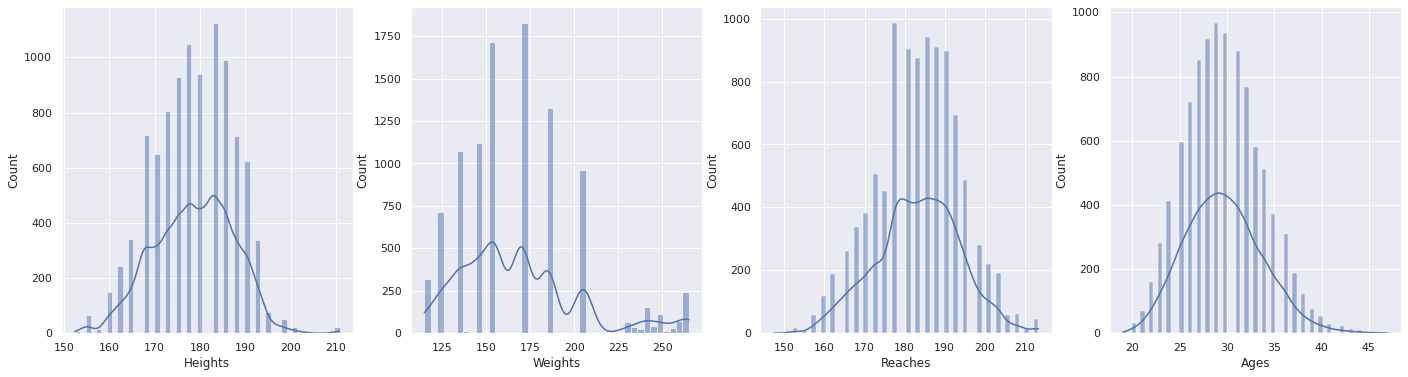

In [ ]:
fig, a = plt.subplots(ncols=4, figsize=(24, 6))

sns.histplot(numerical_features["Heights"], kde=True, ax=a[0])
sns.histplot(numerical_features["Weights"], kde=True, ax=a[1])
sns.histplot(numerical_features["Reaches"], kde=True, ax=a[2])
sns.histplot(numerical_features["Ages"], kde=True, ax=a[3])

plt.show()

We can also use a Q-Q plot to see how normally distributed the data is. The closer the data matches the 45 degree line, the more normal the distribution.

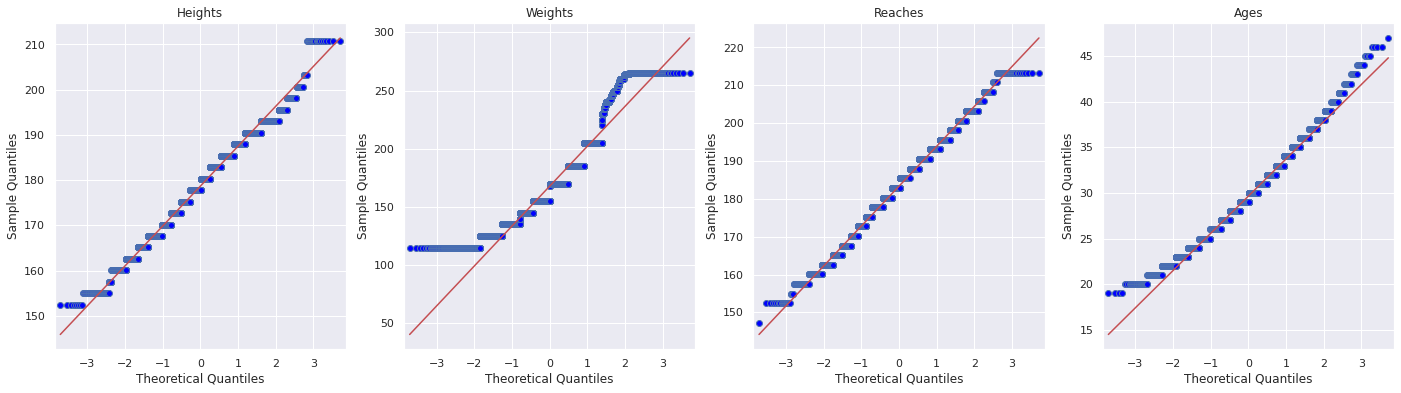

In [ ]:
from scipy.stats import lognorm
import statsmodels.api as sm

fig, a = plt.subplots(ncols=4, figsize=(24, 6))

sm.qqplot(heights, line='s', ax=a[0])
sm.qqplot(weights, line='s', ax=a[1])
sm.qqplot(reaches, line='s', ax=a[2])
sm.qqplot(ages, line='s', ax=a[3])

a[0].set_title("Heights")
a[1].set_title("Weights")
a[2].set_title("Reaches")
a[3].set_title("Ages")

plt.show()

Based on the generated graphs, it seems `Heights`, `Reaches`, and `Ages` are relatively normally distributed. `Weights` on the otherhand seems to be a little skewed right. This is most likely due to the popularity and availability of lower weight classes versus higher weight classes.

## Exploration

We can also create some scatter plots to check for any patterns. It may be general to assume that fighters who are taller, heavier, have longer reach, and are older (by a certain extent) would usually win a fight. We can create a correlation map to confirm the assumption.


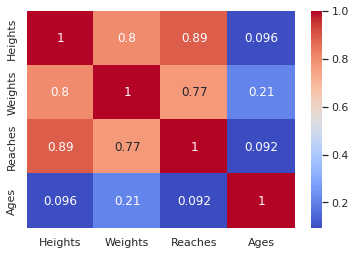

In [ ]:
sns.heatmap(numerical_features.corr(), cmap='coolwarm', annot=True)
plt.show()


As we can see, `reach`, `weight`, and `height` are relatively positively correlated where `age` does not affect those variables. It can be assumed a taller person has a heavier weight and longer reach.

We will start by creating new features that represent the difference between the red and blue fighters. The new features would be the numerical column `R` - `B`

In [ ]:
df["height_diff"] = df["R_Height_cms"] - df["B_Height_cms"]
df["weight_diff"] = df["R_Weight_lbs"] - df["B_Weight_lbs"]
df["reach_diff"] = df["R_Reach_cms"] - df["B_Reach_cms"]
df["age_diff"] = df["R_age"] - df["B_age"]

df.head()

,Winner,weight_class,R_Stance,B_Stance,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,height_diff,weight_diff,reach_diff,age_diff
0,Red,Bantamweight,Orthodox,Orthodox,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,5.08,0.0,7.62,-4.0
1,Red,Middleweight,Orthodox,Orthodox,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,-5.08,-20.0,-5.08,-4.0
2,Red,Heavyweight,Southpaw,Orthodox,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,0.00,23.0,0.00,-4.0
3,Blue,WomenStrawweight,Switch,Southpaw,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,7.62,0.0,5.08,-3.0
4,Blue,WomenBantamweight,Orthodox,Orthodox,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,-12.70,0.0,-10.16,14.0


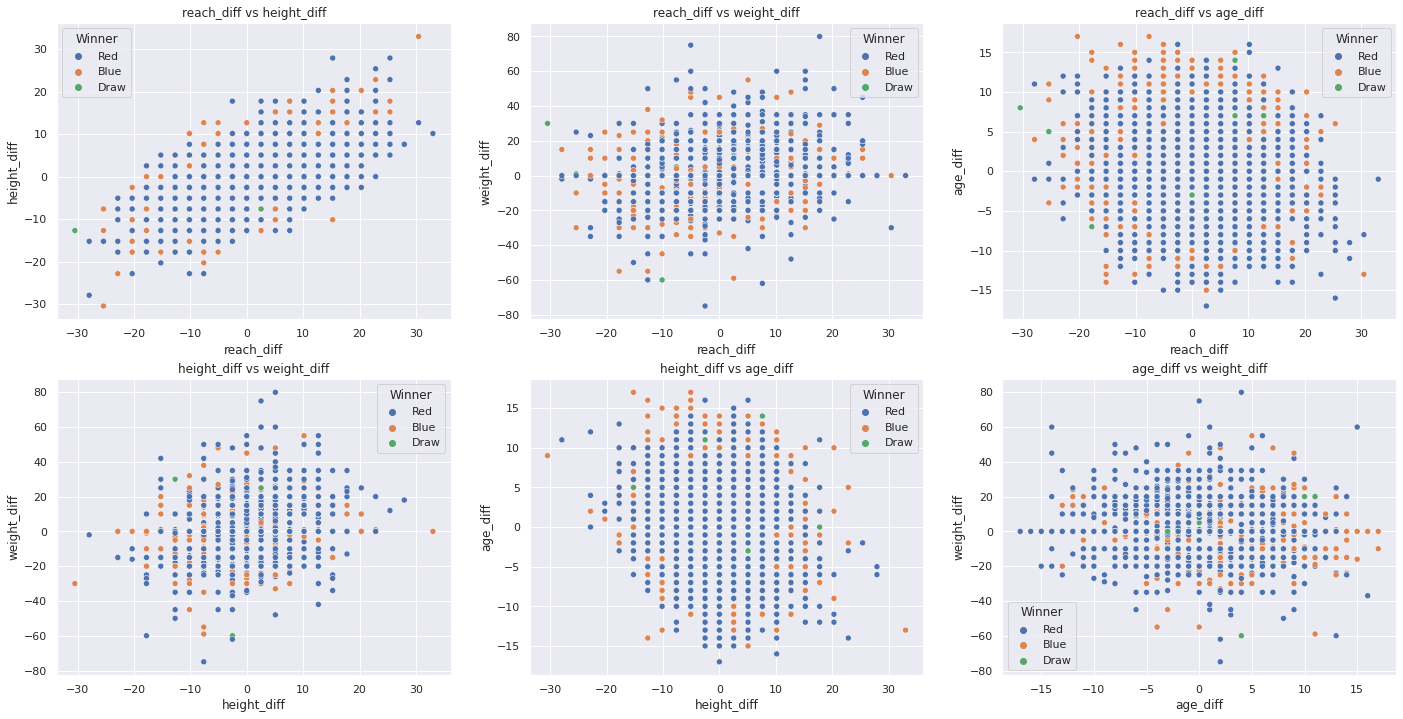

In [ ]:
fig, ax = plt.subplots(2, ncols=3, figsize=(24, 12))

sns.scatterplot(x=df["reach_diff"], y=df["height_diff"], hue=df["Winner"], ax=ax[0][0])
sns.scatterplot(x=df["reach_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[0][1])
sns.scatterplot(x=df["reach_diff"], y=df["age_diff"], hue=df["Winner"], ax=ax[0][2])

ax[0][0].set_title("reach_diff vs height_diff")
ax[0][1].set_title("reach_diff vs weight_diff")
ax[0][2].set_title("reach_diff vs age_diff")

sns.scatterplot(x=df["height_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[1][0])
sns.scatterplot(x=df["height_diff"], y=df["age_diff"], hue=df["Winner"], ax=ax[1][1])
sns.scatterplot(x=df["age_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[1][2])

ax[1][0].set_title("height_diff vs weight_diff")
ax[1][1].set_title("height_diff vs age_diff")
ax[1][2].set_title("age_diff vs weight_diff")

plt.show()

The majority of the graphs seem to be randomly with a lack of correlation. There are interesting "circles" as Blue wins surround the center (0, 0) of the following graphs:
- `reach_diff vs height_diff`
- `reach_diff vs age_diff`
- `height_diff vs age_diff`

This would indicate that a larger difference in `reach`, `height`, and `age` would result in "Blue" winning which surprising.

## Preprocessing
Let's finish organizing the data by performing one-hot encoding on the `stance`.

In [ ]:
copy_df = df # saving a copy

In [ ]:
df = copy_df

features = ["Winner", "R_Stance", "B_Stance", "height_diff", "weight_diff", "reach_diff", "age_diff"]
df = df[features]

# one-hot encoding
df = pd.get_dummies(df, columns=["R_Stance", "B_Stance"])

df.head()

,Winner,height_diff,weight_diff,reach_diff,age_diff,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Red,5.08,0.0,7.62,-4.0,0,1,0,0,0,1,0,0
1,Red,-5.08,-20.0,-5.08,-4.0,0,1,0,0,0,1,0,0
2,Red,0.00,23.0,0.00,-4.0,0,0,1,0,0,1,0,0
3,Blue,7.62,0.0,5.08,-3.0,0,0,0,1,0,0,1,0
4,Blue,-12.70,0.0,-10.16,14.0,0,1,0,0,0,1,0,0


# Supervised Analysis

## Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
log_df = df

y = log_df.loc[:, "Winner"]
X = log_df.loc[:, log_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg_model1 = LogisticRegression()

logreg_model1.fit(X_train, y_train)

print(f'Train Score: {logreg_model1.score(X_train, y_train)}')
print(f'Test Score: {logreg_model1.score(X_test, y_test)}')

Train Score: 0.6309403437815976
Test Score: 0.593939393939394


In [ ]:
from sklearn.model_selection import GridSearchCV

logreg_model2 = LogisticRegression()

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

gridsearch = GridSearchCV(logreg_model2, parameters, cv=5)

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

ValueError: ignored

In [ ]:
logreg_model3 = LogisticRegression(
    C=10,
    penalty='l2'
)

logreg_model3.fit(X_train, y_train)

print(f'Train Score: {logreg_model3.score(X_train, y_train)}')
print(f'Test Score: {logreg_model3.score(X_test, y_test)}')

Train Score: 0.6324570273003033
Test Score: 0.593939393939394


## SVM

We will be using the classifier version of SVM. Typically for SVMs, the data needs to be normalized.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
svc_df = df

scaler = StandardScaler()

features = ["height_diff", "weight_diff", "reach_diff", "age_diff"]

svc_df[features] = scaler.fit_transform(svc_df[features])

svc_df.head()

,Winner,height_diff,weight_diff,reach_diff,age_diff,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Red,0.816915,-0.044582,0.907594,-0.870520,0,1,0,0,0,1,0,0
1,Red,-0.780421,-1.897527,-0.624683,-0.870520,0,1,0,0,0,1,0,0
2,Red,0.018247,2.086306,-0.011772,-0.870520,0,0,1,0,0,1,0,0
3,Blue,1.216249,-0.044582,0.601138,-0.676714,0,0,0,1,0,0,1,0
4,Blue,-1.978424,-0.044582,-1.237594,2.617986,0,1,0,0,0,1,0,0


In [ ]:
y = svc_df.loc[:, "Winner"]
X = svc_df.loc[:, svc_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svc_model1 = SVC()

svc_model1.fit(X_train, y_train)

y_pred = svc_model1.predict(X_test)

print(f'Train Score: {svc_model1.score(X_train, y_train)}')
print(f'Test Score: {svc_model1.score(X_test, y_test)}')

Train Score: 0.6370070778564206
Test Score: 0.6070707070707071


In [ ]:
svc_model2 = SVC()

parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'degree': range(10)
}

gridsearch = GridSearchCV(svc_model2, parameters, cv=5)
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)
print(gridsearch.best_estimator_)
print(gridsearch.best_score_)

In [ ]:
svc_model3 = SVC(
    C=1,
    gamma=0.1,
    kernel='rbf'
)

svc_model3.fit(X_train, y_train)

y_pred = svc_model3.predict(X_test)

print(f'Train Score: {svc_model3.score(X_train, y_train)}')
print(f'Test Score: {svc_model3.score(X_test, y_test)}')


Train Score: 0.6359959555106168
Test Score: 0.604040404040404


## Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
nn_df = df

scaler = StandardScaler()

features = ["height_diff", "weight_diff", "reach_diff", "age_diff"]

nn_df[features] = scaler.fit_transform(nn_df[features])

nn_df.head()

,Winner,height_diff,weight_diff,reach_diff,age_diff,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Red,0.816915,-0.044582,0.907594,-0.870520,0,1,0,0,0,1,0,0
1,Red,-0.780421,-1.897527,-0.624683,-0.870520,0,1,0,0,0,1,0,0
2,Red,0.018247,2.086306,-0.011772,-0.870520,0,0,1,0,0,1,0,0
3,Blue,1.216249,-0.044582,0.601138,-0.676714,0,0,0,1,0,0,1,0
4,Blue,-1.978424,-0.044582,-1.237594,2.617986,0,1,0,0,0,1,0,0


In [ ]:
y = nn_df.loc[:, "Winner"]
X = nn_df.loc[:, nn_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,))

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100}")

Accuracy: 58.78787878787879
